Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import warnings
warnings.filterwarnings("ignore")
import wrangle

In [3]:
df = wrangle.acquire_zillow()

In [4]:
df

,bedrooms,bathrooms,square_ft_area,tax_value,year_built,tax_amount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
2152859,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152860,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152862,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [10]:
train, validate, test = wrangle.wrangle_zillow(df)
train.head()

,bedrooms,bathrooms,square_ft_area,tax_value,year_built,tax_amount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0


Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [14]:
def visualize_scaler(scaler, df, target_columns, bins=10):
    fig, axs = plt.subplots(len(target_columns), 2, figsize=(16, 9))
    df_scaled = df.copy()
    df_scaled[target_columns] = scaler.fit_transform(df[target_columns])
    for (ax1, ax2), col in zip(axs, target_columns):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
    return fig, axs

(<Figure size 1152x648 with 6 Axes>,
 array([[<AxesSubplot:title={'center':'bedrooms before scaling'}, xlabel='bedrooms', ylabel='count'>,
         <AxesSubplot:title={'center':'bedrooms after scaling with MinMaxScaler'}, xlabel='bedrooms', ylabel='count'>],
        [<AxesSubplot:title={'center':'square_ft_area before scaling'}, xlabel='square_ft_area', ylabel='count'>,
         <AxesSubplot:title={'center':'square_ft_area after scaling with MinMaxScaler'}, xlabel='square_ft_area', ylabel='count'>],
        [<AxesSubplot:title={'center':'tax_value before scaling'}, xlabel='tax_value', ylabel='count'>,
         <AxesSubplot:title={'center':'tax_value after scaling with MinMaxScaler'}, xlabel='tax_value', ylabel='count'>]],
       dtype=object))

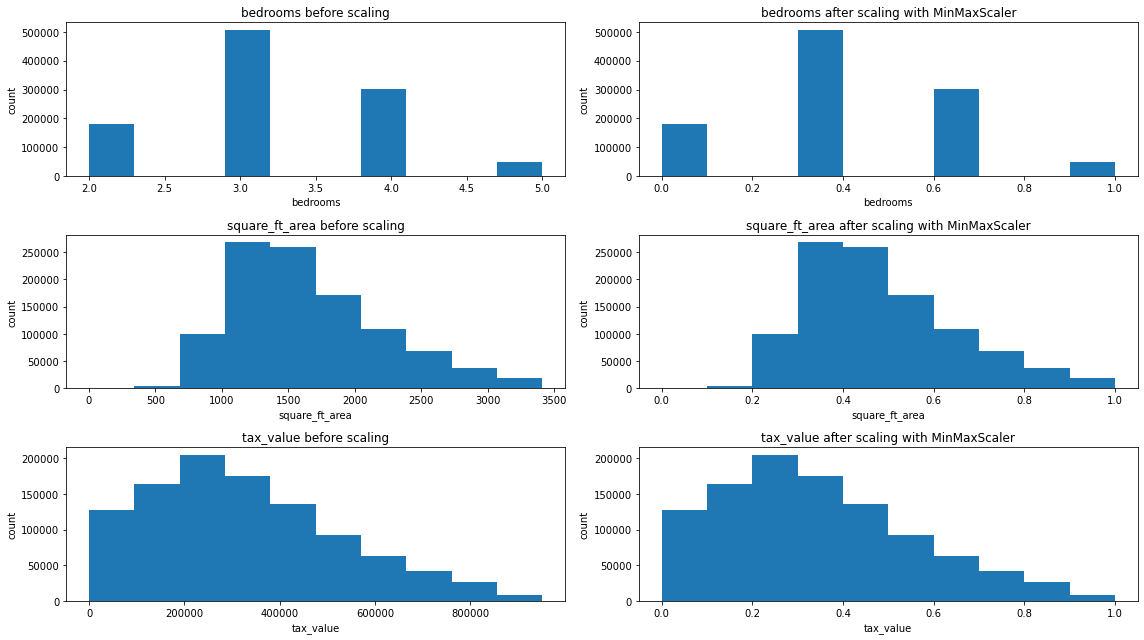

In [16]:
visualize_scaler(
    scaler=MinMaxScaler(),
    df=train,
    target_columns=['bedrooms', 'square_ft_area', 'tax_value'],
)

(<Figure size 1152x648 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'bedrooms before scaling'}, xlabel='bedrooms', ylabel='count'>,
         <AxesSubplot:title={'center':'bedrooms after scaling with QuantileTransformer'}, xlabel='bedrooms', ylabel='count'>],
        [<AxesSubplot:title={'center':'tax_value before scaling'}, xlabel='tax_value', ylabel='count'>,
         <AxesSubplot:title={'center':'tax_value after scaling with QuantileTransformer'}, xlabel='tax_value', ylabel='count'>]],
       dtype=object))

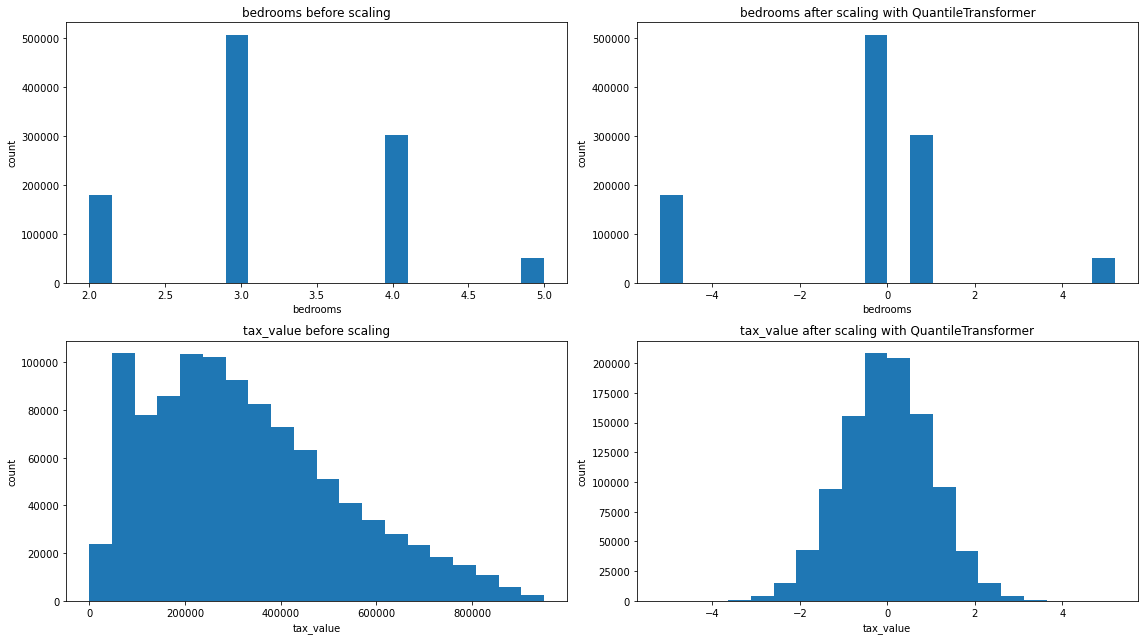

In [17]:
visualize_scaler(
    scaler=QuantileTransformer(output_distribution='normal'),
    df=train,
    target_columns=['bedrooms', 'tax_value'],
    bins=20,
)

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [18]:
#inverse scaler
scaler = MinMaxScaler()
original_data = train[['tax_value']]
scaled_data = scaler.fit_transform(original_data)

(scaler.inverse_transform(scaled_data) == original_data).all()
# np.isclose(scaler.inverse_transform(scaled_data), original_data).all()

tax_value    False
dtype: bool

Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!